# Collecting and analysing real-time data from Swiss charging stations

## For details of data see:

Summary: https://www.uvek-gis.admin.ch/BFE/diemo/demo-prod.html<br>
Map:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; https://map.geo.admin.ch/?lang=de&topic=ech&bgLayer=ch.swisstopo.pixelkarte-farbe&layers=ch.bfe.ladestellen-elektromobilitaet

## Libraries and settings

In [15]:
# Libraries
from __future__ import print_function

import os
import json
import fnmatch
import numpy as np
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
from pandas import json_normalize
from datetime import datetime, timedelta

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

u:\Lektionen\Scientific_Programming_FS2023\scientific_programming\Week_11\exercises


## Server query of utilization data

In [16]:
# Function
def my_func():
    
    # Get current time
    # print(datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))
    
    try:
        
        # Server request to get .json-file
        url = ('https://data.geo.admin.ch/ch.bfe.ladestellen-elektromobilitaet/'\
               'status/oicp/ch.bfe.ladestellen-elektromobilitaet.json')
        request = urllib.request.urlopen(url).read()
        data = json.loads(request)
        
        # Path on Windows with filename based on the current time
        filename = 'data-%s.json'% datetime.now().strftime('%Y-%m-%d-%H-%M-%S')
        # Path on Linux-Server with filename based on the current time
        #filename = '/home/ubuntu/data/data-%s.json'%datetime.now().strftime('%Y-%m-%d-%H-%M-%S')
                       
        # Saving the file
        with open(filename, 'w') as outfile:
            json.dump(data, outfile)
        
    except:

        pass

    return datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# Function call
dt = my_func()
dt

'2023-04-27 19:16:42'

## Analysing the utilization rate of Electric Vehicle Supply Equipment (EVSE) units

In [17]:
# Get .json files
flist = fnmatch.filter(os.listdir('.'), '*.json')

# Read to data frame
df_orig = pd.read_json(flist[0])
df = json_normalize(df_orig['EVSEStatuses'], record_path=['EVSEStatusRecord'])
df

,EvseID,EVSEStatus
0,CH*SWIEE10302,Available
1,CH*SWIEE10303,Available
2,CH*SWIEE10304,Available
3,CH*SWIEE10306,Available
4,CH*SWIEE10307,Available
...,...,...
11840,CH*TES*E123*0320,Unknown
11841,CH*TES*E123*0331,Unknown
11842,CH*TES*E123*0332,Unknown
11843,CH*TES*E123*0333,Unknown


## Showing the number of EVSEs per EVSEStatus

Occupied         507
OutOfService     725
Unknown         1068
Available       9545
Name: EVSEStatus, dtype: int64


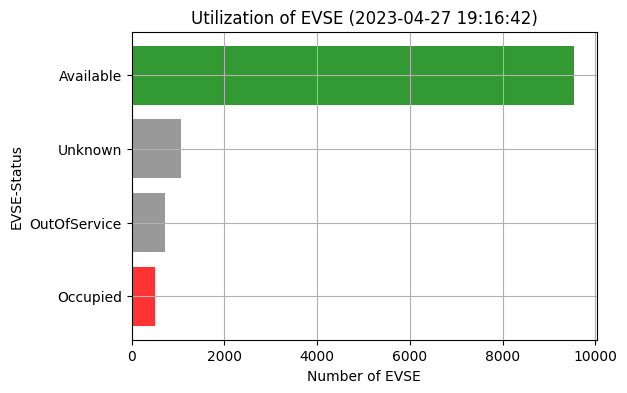

In [18]:
# Show number of EVSE per EVSEStatus
df_bar = df['EVSEStatus'].value_counts().sort_values(ascending=True)
print(df_bar)

# Simple bar chart
ncars = list(df_bar.values)
make = list(df_bar.index.values)
y_pos = np.arange(len(make))
# print(ncars)
# print(bars)

# Figure
fig, ax = plt.subplots(figsize=(6,4))
ax.barh(y_pos, ncars, align='center', color=['red', 'gray', 'gray', 'green'], alpha=0.8)
ax.set_yticks(y_pos, labels=make)
ax.set_xlabel('Number of EVSE')
ax.set_ylabel('EVSE-Status')
ax.set_title(f'Utilization of EVSE ({dt})')
ax.grid()

# Show graph
plt.show()


## Calculating the utilization rate of EVSEs

In [19]:
f"Utilization rate ({dt}): {df_bar[0] / (df_bar[0] + df_bar[3]) * 100:.2} %"

'Utilization rate (2023-04-27 19:16:42): 5.0 %'

## Removing .json files from the folder

In [20]:
# Remove all .json files from the folder
for file in flist:
    try:
        os.remove(file)
        print("The following .json file was deleted:", file)
    except:
        print("Error while deleting the .json file:", file)

The following .json file was deleted: data-2023-04-27-19-16-41.json


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [21]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2023-04-27 19:16:42
Python Version: 3.10.9
-----------------------------------
